In [203]:
import numpy as np
import pandas as pd
import re

In [204]:
## To view data with full columns and rows
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [205]:
df = pd.read_csv('gurgaon_properties_cleaned_v1.csv')

In [206]:
df.shape

(3803, 17)

In [207]:
df.head(1)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features
0,flat,smart world orchard,sector 61,2.6,14723.0,1766.0,Super Built up area 1630(151.43 sq.m.),3,3,2,not available,2.0,NaN,Within 6 months,"['Sector 55-56 Metro station', 'Bestech Central Square Mall', 'Golf Course Ext Road', 'Badshahpur Sohna Rd Hwy', 'ORCHIDS The International School', 'Sushant University', 'Marengo Asia Hospitals', 'Indira Gandhi Intl Airport', 'Gurgaon Railway Station']",[],"['Lift(s)', 'Swimming Pool', 'Park', 'Visitor Parking', 'Security Personnel', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']"


### 1. areaWithType

In [209]:
df[['area','areaWithType']].sample(5)

,area,areaWithType
3691,639.0,Super Built up area 639(59.37 sq.m.)Built Up area: 600 sq.ft. (55.74 sq.m.)Carpet area: 541 sq.ft. (50.26 sq.m.)
2799,1980.0,Super Built up area 1980(183.95 sq.m.)
2373,2383.0,Super Built up area 2383(221.39 sq.m.)Built Up area: 2200 sq.ft. (204.39 sq.m.)Carpet area: 2000 sq.ft. (185.81 sq.m.)
3587,2125.0,Super Built up area 2200(204.39 sq.m.)
1352,2781.0,Carpet area: 2785 (258.73 sq.m.)


In [210]:
# This function extracts the Super Built up area
def get_super_built_up_area(text):
    match = re.search(r'Super Built up area (\d+\.?\d*)', text)
    if match:
        return float(match.group(1))
    return None

In [211]:
# This function extracts the Built Up area or Carpet area
def get_area(text, area_type):
    match = re.search(area_type + r'\s*:\s*(\d+\.?\d*)', text)
    if match:
        return float(match.group(1))
    return None

In [212]:
# This function checks if the area is provided in sq.m. and converts it to sqft if needed
def convert_to_sqft(text, area_value):
    if area_value is None:
        return None
    match = re.search(r'{} \((\d+\.?\d*) sq.m.\)'.format(area_value), text)
    if match:
        sq_m_value = float(match.group(1))
        return sq_m_value * 10.7639  # conversion factor from sq.m. to sqft
    return area_value

In [213]:
# Extract Super Built up area and convert to sqft if needed
df['super_built_up_area'] = df['areaWithType'].apply(get_super_built_up_area)
df['super_built_up_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['super_built_up_area']), axis=1)

# Extract Built Up area and convert to sqft if needed
df['built_up_area'] = df['areaWithType'].apply(lambda x: get_area(x, 'Built Up area'))
df['built_up_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['built_up_area']), axis=1)

# Extract Carpet area and convert to sqft if needed
df['carpet_area'] = df['areaWithType'].apply(lambda x: get_area(x, 'Carpet area'))
df['carpet_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['carpet_area']), axis=1)

In [214]:
df[['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].sample(5)

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
2072,4.50,house,1350.0,Plot area 150(125.42 sq.m.),NaN,NaN,NaN
1068,0.60,flat,600.0,Super Built up area 600(55.74 sq.m.),600.0,NaN,NaN
1509,0.80,house,1200.0,Plot area 1200(111.48 sq.m.),NaN,NaN,NaN
229,1.65,flat,1579.0,Super Built up area 1579(146.69 sq.m.)Built Up area: 1420 sq.ft. (131.92 sq.m.)Carpet area: 1220 sq.ft. (113.34 sq.m.),1579.0,1420.0,1220.0
1798,0.95,flat,2235.0,Super Built up area 2000(185.81 sq.m.)Built Up area: 1983 sq.ft. (184.23 sq.m.)Carpet area: 1900 sq.ft. (176.52 sq.m.),2000.0,1983.0,1900.0


In [215]:
## check how many instances are there with not null values in all 3 extracted column
df[~((df['super_built_up_area'].isnull()) | (df['built_up_area'].isnull()) | (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].shape

(534, 7)

In [216]:
## Exctarct instances with plot area
df[df['areaWithType'].str.contains('Plot')][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].head(5)

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
7,NaN,house,NaN,Plot area 670(560.21 sq.m.),NaN,NaN,NaN
11,1.50,house,1300.0,Plot area 1300(120.77 sq.m.),NaN,NaN,NaN
18,0.66,house,612.0,Plot area 612(56.86 sq.m.),NaN,NaN,NaN
20,2.75,house,1557.0,Plot area 173(144.65 sq.m.),NaN,NaN,NaN
22,9.00,house,2700.0,Plot area 300(250.84 sq.m.),NaN,NaN,NaN


In [217]:
## ckeck null values for 3 column
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                    18
price_per_sqft           18
area                     18
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
additionalRoom            0
floorNum                 19
facing                 1105
agePossession             1
nearbyLocations         177
furnishDetails          981
features                635
super_built_up_area    1888
built_up_area          2616
carpet_area            1859
dtype: int64

In [218]:
## make new data frame where all the values are null for 3 columns
all_nan_df = df[((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']]

In [219]:
all_nan_df.head()

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
7,NaN,house,NaN,Plot area 670(560.21 sq.m.),NaN,NaN,NaN
11,1.50,house,1300.0,Plot area 1300(120.77 sq.m.),NaN,NaN,NaN
18,0.66,house,612.0,Plot area 612(56.86 sq.m.),NaN,NaN,NaN
20,2.75,house,1557.0,Plot area 173(144.65 sq.m.),NaN,NaN,NaN
22,9.00,house,2700.0,Plot area 300(250.84 sq.m.),NaN,NaN,NaN


In [220]:
## store index of above data frame
all_nan_index = df[((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].index


In [221]:
# Function to extract plot area from 'areaWithType' column
def extract_plot_area(area_with_type):
    match = re.search(r'Plot area (\d+\.?\d*)', area_with_type)
    return float(match.group(1)) if match else None

In [222]:
all_nan_df['built_up_area'] = all_nan_df['areaWithType'].apply(extract_plot_area)

In [223]:
all_nan_df

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
7,NaN,house,NaN,Plot area 670(560.21 sq.m.),NaN,670.00,NaN
11,1.50,house,1300.0,Plot area 1300(120.77 sq.m.),NaN,1300.00,NaN
18,0.66,house,612.0,Plot area 612(56.86 sq.m.),NaN,612.00,NaN
20,2.75,house,1557.0,Plot area 173(144.65 sq.m.),NaN,173.00,NaN
22,9.00,house,2700.0,Plot area 300(250.84 sq.m.),NaN,300.00,NaN
31,5.50,house,1800.0,Plot area 200(167.23 sq.m.),NaN,200.00,NaN
37,5.00,house,2340.0,Plot area 260(217.39 sq.m.),NaN,260.00,NaN
41,8.81,house,3240.0,Plot area 360(301.01 sq.m.),NaN,360.00,NaN
44,1.95,house,920.0,Plot area 920(85.47 sq.m.),NaN,920.00,NaN
47,4.60,house,3771.0,Plot area 419(350.34 sq.m.),NaN,419.00,NaN


In [224]:
## Generally plot area is in sq-yard
## Function to convert Builtup area from sq-yard/sq-mt to sq ft
def convert_scale(row):
    if np.isnan(row['area']) or np.isnan(row['built_up_area']):
        return row['built_up_area']
    else:
        if round(row['area']/row['built_up_area']) == 9.0:
            return row['built_up_area'] * 9
        elif round(row['area']/row['built_up_area']) == 11.0:
            return row['built_up_area'] * 10.7
        else:
            return row['built_up_area']

In [225]:
all_nan_df['built_up_area'] = all_nan_df.apply(convert_scale,axis=1)

In [226]:
all_nan_df

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
7,NaN,house,NaN,Plot area 670(560.21 sq.m.),NaN,670.00,NaN
11,1.50,house,1300.0,Plot area 1300(120.77 sq.m.),NaN,1300.00,NaN
18,0.66,house,612.0,Plot area 612(56.86 sq.m.),NaN,612.00,NaN
20,2.75,house,1557.0,Plot area 173(144.65 sq.m.),NaN,1557.00,NaN
22,9.00,house,2700.0,Plot area 300(250.84 sq.m.),NaN,2700.00,NaN
31,5.50,house,1800.0,Plot area 200(167.23 sq.m.),NaN,1800.00,NaN
37,5.00,house,2340.0,Plot area 260(217.39 sq.m.),NaN,2340.00,NaN
41,8.81,house,3240.0,Plot area 360(301.01 sq.m.),NaN,3240.00,NaN
44,1.95,house,920.0,Plot area 920(85.47 sq.m.),NaN,920.00,NaN
47,4.60,house,3771.0,Plot area 419(350.34 sq.m.),NaN,3771.00,NaN


In [227]:
## Update the orioginal data frame
df.update(all_nan_df)

In [228]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                    18
price_per_sqft           18
area                     18
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
additionalRoom            0
floorNum                 19
facing                 1105
agePossession             1
nearbyLocations         177
furnishDetails          981
features                635
super_built_up_area    1888
built_up_area          2070
carpet_area            1859
dtype: int64

In [229]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area
0,flat,smart world orchard,sector 61,2.60,14723.0,1766.0,Super Built up area 1630(151.43 sq.m.),3,3,2,not available,2.0,NaN,Within 6 months,"['Sector 55-56 Metro station', 'Bestech Central Square Mall', 'Golf Course Ext Road', 'Badshahpur Sohna Rd Hwy', 'ORCHIDS The International School', 'Sushant University', 'Marengo Asia Hospitals', 'Indira Gandhi Intl Airport', 'Gurgaon Railway Station']",[],"['Lift(s)', 'Swimming Pool', 'Park', 'Visitor Parking', 'Security Personnel', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']",1630.0,NaN,NaN
1,flat,pioneer park,sector 61,2.10,11666.0,1800.0,Super Built up area 1800(167.23 sq.m.)Carpet area: 1400 sq.ft. (130.06 sq.m.),3,3,3,not available,15.0,South-East,1 to 5 Year Old,"['Sector 55-56 Rapid Metro', 'Hong Kong Bazaar', 'Golf Course Ext Rd', 'Gurugram University', 'Pathways School Gurgaon', 'W Pratiksha Hospital', 'Indira Gandhi International Airport', 'Duke Horse Riding Club', 'DLF Golf and Country Club', 'AIPL Business Club', 'Radisson Hotel Gurugram', 'SkyJumper Trampoline Park', 'PVR Drive In Theatre', 'Surajgarh Gurgaon']","['3 Wardrobe', '1 Water Purifier', '4 Fan', '1 Exhaust Fan', '4 Geyser', '14 Light', '2 AC', '1 Modular Kitchen', '1 Curtains', '1 Chimney', 'No Bed', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine']","['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']",1800.0,NaN,1400.0
2,flat,godrej air,sector 85,2.60,12212.0,2129.0,Built Up area: 2129 (197.79 sq.m.),3,3,3,servant room,17.0,NaN,Dec 2023,"['Sapphire 83 Mall', 'Sector 86 Road', 'Dwarka Expy', 'Euro International School', 'Sushant University', 'Shri Balaji’s Multispeciality Hospital', 'Indira Gandhi Intl Airport', 'Garhi Harsaru Junction']",NaN,NaN,NaN,2129.0,NaN
3,flat,shree vardhman victoria,sector 70,1.23,9111.0,1350.0,Super Built up area 1350(125.42 sq.m.),2,2,3,study room,1.0,North-East,1 to 5 Year Old,"['Airia Mall', 'Golf Course Extn Road', 'Sohna Road', 'Southern Peripheral Rd, Gurugram', 'Kunskapsskolan International', 'Ektaa Hospitals Main Sohna Rd', 'Sanjeevani Hospital - Child Specialist', 'Federal Bank Sector 71', 'Central Bank Of India Sohna Rd', 'Axis Bank, Sohna Rd', 'Spaze Palazo, Golf Course Ext Rd', 'VATIKA BUSINESS PARK Sohna Rd', 'The Medicity, Spaze iTech Park', 'Tulip Violet Society, Sector 69', 'IndianOil, Hasanpur']",NaN,"['Power Back-up', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'Swimming Pool', 'Park', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center', 'Water softening plant']",1350.0,NaN,NaN
4,flat,central park flower valley,sector 33,1.35,10384.0,1300.0,Carpet area: 1300 (120.77 sq.m.),3,2,2,not available,3.0,West,0 to 1 Year Old,"['Golf Course Extension Rd', 'Rajiv Chowk - Sohna Highway', 'KMP corridor', 'Marigold Secondary School', 'Alpine Convent School', 'The Millenium School', 'GD Goenka University', 'Medanta Hospital', 'Alpine Hospital', 'Pushpanjali Hospital', 'IGI Airport', 'Country Inn', 'Westin', 'Central Park Resorts', 'De Adventure Park']","['3 Wardrobe', '5 Fan', '1 Modular Kitchen', '4 AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Security / Fire Alarm', 'Power Back-up', 'Feng Shui / Vaastu Compliant', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'Water Storage', 'Bank Attached Property', 'Visitor Parking', 'Swimming Pool', 'Park', 'Internet/wi-fi connectivity', 'Low Density Society', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Commu

## 2. additionalRoom

In [231]:
df['additionalRoom'].value_counts()

additionalRoom
not available                                    1587
servant room                                      705
study room                                        250
others                                            225
pooja room                                        165
store room                                         99
study room,servant room                            99
pooja room,servant room                            82
pooja room,study room,servant room,store room      72
servant room,others                                60
pooja room,study room,servant room                 55
pooja room,study room,servant room,others          54
servant room,pooja room                            38
servant room,store room                            33
study room,others                                  29
pooja room,study room                              22
pooja room,others                                  17
pooja room,store room                              15
pooja room,st

In [232]:
# additional room
# List of new columns to be created based on categories
new_cols = ['study room', 'servant room', 'store room', 'pooja room', 'others']

# Populate the new columns based on the "additionalRoom" column
for col in new_cols:
    df[col] = df['additionalRoom'].str.contains(col).astype(int)

In [233]:
df.sample(5)[['additionalRoom','study room', 'servant room', 'store room', 'pooja room', 'others']]

,additionalRoom,study room,servant room,store room,pooja room,others
2827,servant room,0,1,0,0,0
990,"servant room,others",0,1,0,0,1
526,servant room,0,1,0,0,0
3296,"store room,pooja room",0,0,1,1,0
2912,"study room,servant room",1,1,0,0,0


In [234]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others
0,flat,smart world orchard,sector 61,2.60,14723.0,1766.0,Super Built up area 1630(151.43 sq.m.),3,3,2,not available,2.0,NaN,Within 6 months,"['Sector 55-56 Metro station', 'Bestech Central Square Mall', 'Golf Course Ext Road', 'Badshahpur Sohna Rd Hwy', 'ORCHIDS The International School', 'Sushant University', 'Marengo Asia Hospitals', 'Indira Gandhi Intl Airport', 'Gurgaon Railway Station']",[],"['Lift(s)', 'Swimming Pool', 'Park', 'Visitor Parking', 'Security Personnel', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']",1630.0,NaN,NaN,0,0,0,0,0
1,flat,pioneer park,sector 61,2.10,11666.0,1800.0,Super Built up area 1800(167.23 sq.m.)Carpet area: 1400 sq.ft. (130.06 sq.m.),3,3,3,not available,15.0,South-East,1 to 5 Year Old,"['Sector 55-56 Rapid Metro', 'Hong Kong Bazaar', 'Golf Course Ext Rd', 'Gurugram University', 'Pathways School Gurgaon', 'W Pratiksha Hospital', 'Indira Gandhi International Airport', 'Duke Horse Riding Club', 'DLF Golf and Country Club', 'AIPL Business Club', 'Radisson Hotel Gurugram', 'SkyJumper Trampoline Park', 'PVR Drive In Theatre', 'Surajgarh Gurgaon']","['3 Wardrobe', '1 Water Purifier', '4 Fan', '1 Exhaust Fan', '4 Geyser', '14 Light', '2 AC', '1 Modular Kitchen', '1 Curtains', '1 Chimney', 'No Bed', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine']","['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']",1800.0,NaN,1400.0,0,0,0,0,0
2,flat,godrej air,sector 85,2.60,12212.0,2129.0,Built Up area: 2129 (197.79 sq.m.),3,3,3,servant room,17.0,NaN,Dec 2023,"['Sapphire 83 Mall', 'Sector 86 Road', 'Dwarka Expy', 'Euro International School', 'Sushant University', 'Shri Balaji’s Multispeciality Hospital', 'Indira Gandhi Intl Airport', 'Garhi Harsaru Junction']",NaN,NaN,NaN,2129.0,NaN,0,1,0,0,0
3,flat,shree vardhman victoria,sector 70,1.23,9111.0,1350.0,Super Built up area 1350(125.42 sq.m.),2,2,3,study room,1.0,North-East,1 to 5 Year Old,"['Airia Mall', 'Golf Course Extn Road', 'Sohna Road', 'Southern Peripheral Rd, Gurugram', 'Kunskapsskolan International', 'Ektaa Hospitals Main Sohna Rd', 'Sanjeevani Hospital - Child Specialist', 'Federal Bank Sector 71', 'Central Bank Of India Sohna Rd', 'Axis Bank, Sohna Rd', 'Spaze Palazo, Golf Course Ext Rd', 'VATIKA BUSINESS PARK Sohna Rd', 'The Medicity, Spaze iTech Park', 'Tulip Violet Society, Sector 69', 'IndianOil, Hasanpur']",NaN,"['Power Back-up', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'Swimming Pool', 'Park', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center', 'Water softening plant']",1350.0,NaN,NaN,1,0,0,0,0
4,flat,central park flower valley,sector 33,1.35,10384.0,1300.0,Carpet area: 1300 (120.77 sq.m.),3,2,2,not available,3.0,West,0 to 1 Year Old,"['Golf Course Extension Rd', 'Rajiv Chowk - Sohna Highway', 'KMP corridor', 'Marigold Secondary School', 'Alpine Convent School', 'The Millenium School', 'GD Goenka University', 'Medanta Hospital', 'Alpine Hospital', 'Pushpanjali Hospital', 'IGI Airport', 'Country Inn', 'Westin', 'Central Park Resorts', 'De Adventure Park']","['3 Wardrobe', '5 Fan', '1 Modular Kitchen', '4 AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Security / Fire Alarm', 'Power Back-up', 'Feng Shui / Vaastu Compliant', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'Water Storage', 'Bank Attached Property', 'Visitor Parking', 'Swimming Pool', 'Park', 'Internet/wi-fi connect

## 3. agePossession

In [236]:
df['agePossession'].value_counts()

agePossession
1 to 5 Year Old       1676
5 to 10 Year Old       575
0 to 1 Year Old        530
undefined              332
10+ Year Old           310
Under Construction      90
Within 6 months         70
Within 3 months         26
Dec 2023                22
By 2023                 19
By 2024                 17
Dec 2024                16
Mar 2024                14
Jan 2024                 8
Oct 2024                 8
Dec 2025                 7
Aug 2023                 7
Jun 2024                 7
Nov 2023                 5
Aug 2024                 4
Oct 2023                 4
Jul 2024                 4
Sep 2023                 4
By 2025                  4
May 2024                 3
Jan 2025                 3
Nov 2024                 3
Feb 2024                 3
Sep 2025                 2
Dec 2026                 2
Jul 2025                 2
Oct 2025                 2
Mar 2025                 2
By 2027                  2
Jul 2027                 2
Jun 2027                 2
Apr 2026      

In [237]:
## Function to categorize property based on age_possession
def categorize_age_possession(value):
    if pd.isna(value):
        return "Undefined"
    if "0 to 1 Year Old" in value or "Within 6 months" in value or "Within 3 months" in value:
        return "New Property"
    if "1 to 5 Year Old" in value:
        return "Relatively New"
    if "5 to 10 Year Old" in value:
        return "Moderately Old"
    if "10+ Year Old" in value:
        return "Old Property"
    if "Under Construction" in value or "By" in value:
        return "Under Construction"
    try:
        # For entries like 'May 2024'
        int(value.split(" ")[-1])
        return "Under Construction"
    except:
        return "Undefined"

In [238]:
df['agePossession'] = df['agePossession'].apply(categorize_age_possession)

In [239]:
df['agePossession'].value_counts()

agePossession
Relatively New        1676
New Property           626
Moderately Old         575
Undefined              333
Old Property           310
Under Construction     283
Name: count, dtype: int64

In [240]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others
0,flat,smart world orchard,sector 61,2.60,14723.0,1766.0,Super Built up area 1630(151.43 sq.m.),3,3,2,not available,2.0,NaN,New Property,"['Sector 55-56 Metro station', 'Bestech Central Square Mall', 'Golf Course Ext Road', 'Badshahpur Sohna Rd Hwy', 'ORCHIDS The International School', 'Sushant University', 'Marengo Asia Hospitals', 'Indira Gandhi Intl Airport', 'Gurgaon Railway Station']",[],"['Lift(s)', 'Swimming Pool', 'Park', 'Visitor Parking', 'Security Personnel', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']",1630.0,NaN,NaN,0,0,0,0,0
1,flat,pioneer park,sector 61,2.10,11666.0,1800.0,Super Built up area 1800(167.23 sq.m.)Carpet area: 1400 sq.ft. (130.06 sq.m.),3,3,3,not available,15.0,South-East,Relatively New,"['Sector 55-56 Rapid Metro', 'Hong Kong Bazaar', 'Golf Course Ext Rd', 'Gurugram University', 'Pathways School Gurgaon', 'W Pratiksha Hospital', 'Indira Gandhi International Airport', 'Duke Horse Riding Club', 'DLF Golf and Country Club', 'AIPL Business Club', 'Radisson Hotel Gurugram', 'SkyJumper Trampoline Park', 'PVR Drive In Theatre', 'Surajgarh Gurgaon']","['3 Wardrobe', '1 Water Purifier', '4 Fan', '1 Exhaust Fan', '4 Geyser', '14 Light', '2 AC', '1 Modular Kitchen', '1 Curtains', '1 Chimney', 'No Bed', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine']","['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']",1800.0,NaN,1400.0,0,0,0,0,0
2,flat,godrej air,sector 85,2.60,12212.0,2129.0,Built Up area: 2129 (197.79 sq.m.),3,3,3,servant room,17.0,NaN,Under Construction,"['Sapphire 83 Mall', 'Sector 86 Road', 'Dwarka Expy', 'Euro International School', 'Sushant University', 'Shri Balaji’s Multispeciality Hospital', 'Indira Gandhi Intl Airport', 'Garhi Harsaru Junction']",NaN,NaN,NaN,2129.0,NaN,0,1,0,0,0
3,flat,shree vardhman victoria,sector 70,1.23,9111.0,1350.0,Super Built up area 1350(125.42 sq.m.),2,2,3,study room,1.0,North-East,Relatively New,"['Airia Mall', 'Golf Course Extn Road', 'Sohna Road', 'Southern Peripheral Rd, Gurugram', 'Kunskapsskolan International', 'Ektaa Hospitals Main Sohna Rd', 'Sanjeevani Hospital - Child Specialist', 'Federal Bank Sector 71', 'Central Bank Of India Sohna Rd', 'Axis Bank, Sohna Rd', 'Spaze Palazo, Golf Course Ext Rd', 'VATIKA BUSINESS PARK Sohna Rd', 'The Medicity, Spaze iTech Park', 'Tulip Violet Society, Sector 69', 'IndianOil, Hasanpur']",NaN,"['Power Back-up', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'Swimming Pool', 'Park', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center', 'Water softening plant']",1350.0,NaN,NaN,1,0,0,0,0
4,flat,central park flower valley,sector 33,1.35,10384.0,1300.0,Carpet area: 1300 (120.77 sq.m.),3,2,2,not available,3.0,West,New Property,"['Golf Course Extension Rd', 'Rajiv Chowk - Sohna Highway', 'KMP corridor', 'Marigold Secondary School', 'Alpine Convent School', 'The Millenium School', 'GD Goenka University', 'Medanta Hospital', 'Alpine Hospital', 'Pushpanjali Hospital', 'IGI Airport', 'Country Inn', 'Westin', 'Central Park Resorts', 'De Adventure Park']","['3 Wardrobe', '5 Fan', '1 Modular Kitchen', '4 AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Security / Fire Alarm', 'Power Back-up', 'Feng Shui / Vaastu Compliant', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'Water Storage', 'Bank Attached Property', 'Visitor Parking', 'Swimming Pool', 'Park', 'Internet/wi-fi conne

## 4. furnishDetails

In [242]:
df.sample(5)[['furnishDetails','features']]

,furnishDetails,features
1305,"['3 Wardrobe', '1 Water Purifier', '11 Fan', '1 Exhaust Fan', '3 Geyser', '20 Light', '1 Modular Kitchen', '1 Chimney', '1 Curtains', 'No AC', 'No Bed', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine']","['Centrally Air Conditioned', 'Water purifier', 'Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']"
2270,"['4 Fan', '3 Geyser', '4 Light', '3 AC', '1 Chimney', '1 Modular Kitchen', '3 Wardrobe', 'No Bed', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']"
1887,"['1 Bed', '1 Sofa', '8 Light', '3 AC', '1 Curtains', 'No Chimney', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Internet/wi-fi connectivity', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Shopping Centre', 'Fitness Centre / GYM', 'Rain Water Harvesting', 'Club house / Community Center']"
3479,"['5 Wardrobe', '5 Fan', '1 Exhaust Fan', '4 Geyser', '1 Stove', '16 Light', '1 Chimney', '5 AC', '1 Modular Kitchen', '8 Curtains', 'No Bed', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']"
1278,"['3 Fan', '4 Light', '1 Wardrobe', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Lift(s)', 'Water Storage', 'Visitor Parking']"


In [243]:
# Extract all unique furnishings from the furnishDetails column
all_furnishings = []
for detail in df['furnishDetails'].dropna():
    furnishings = detail.replace('[', '').replace(']', '').replace("'", "").split(', ')
    all_furnishings.extend(furnishings)
unique_furnishings = list(set(all_furnishings))

# Define a function to extract the count of a furnishing from the furnishDetails
def get_furnishing_count(details, furnishing):
    if isinstance(details, str):
        if f"No {furnishing}" in details:
            return 0
        pattern = re.compile(f"(\d+) {furnishing}")
        match = pattern.search(details)
        if match:
            return int(match.group(1))
        elif furnishing in details:
            return 1
    return 0

# Simplify the furnishings list by removing "No" prefix and numbers
columns_to_include = [re.sub(r'No |\d+', '', furnishing).strip() for furnishing in unique_furnishings]
columns_to_include = list(set(columns_to_include))  # Get unique furnishings
columns_to_include = [furnishing for furnishing in columns_to_include if furnishing]  # Remove empty strings

# Create new columns for each unique furnishing and populate with counts
for furnishing in columns_to_include:
    df[furnishing] = df['furnishDetails'].apply(lambda x: get_furnishing_count(x, furnishing))

# Create the new dataframe with the required columns
furnishings_df = df[['furnishDetails'] + columns_to_include]

<>:13: SyntaxWarning: invalid escape sequence '\d'
<>:13: SyntaxWarning: invalid escape sequence '\d'
C:\Users\daksh\AppData\Local\Temp\ipykernel_15528\2445438592.py:13: SyntaxWarning: invalid escape sequence '\d'
  pattern = re.compile(f"(\d+) {furnishing}")


In [244]:
furnishings_df
print(furnishings_df.shape)

(3803, 19)


In [245]:
furnishings_df.drop(columns=['furnishDetails'],inplace=True)

C:\Users\daksh\AppData\Local\Temp\ipykernel_15528\114705885.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  furnishings_df.drop(columns=['furnishDetails'],inplace=True)


In [246]:
furnishings_df.sample(5)

,Washing Machine,Exhaust Fan,TV,Microwave,Bed,Water Purifier,Fan,Modular Kitchen,Fridge,Wardrobe,Light,AC,Chimney,Dining Table,Curtains,Sofa,Geyser,Stove
3171,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1893,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2432,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
641,0,1,0,0,0,0,5,1,0,3,15,5,1,0,1,0,2,0
2567,0,0,0,0,1,0,1,1,1,4,1,0,0,0,1,0,0,0


In [247]:
## Apply K means clustering algorithm to group data based on furnishing detail
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [248]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(furnishings_df)

In [249]:
## decide number cluster based on elbow method
wcss_reduced = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    wcss_reduced.append(kmeans.inertia_)

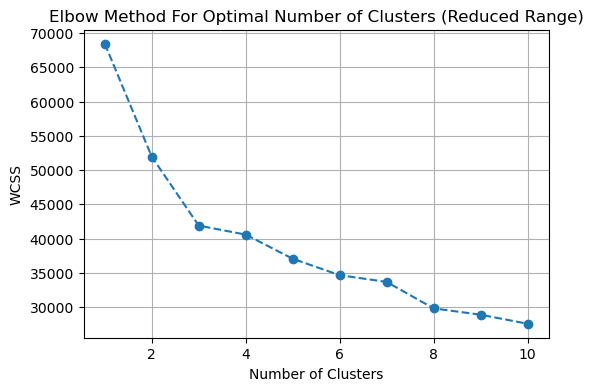

In [250]:
# Plot the results
plt.figure(figsize=(6, 4))
plt.plot(range(1,11), wcss_reduced, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters (Reduced Range)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [251]:
n_clusters = 3

# Fit the KMeans model
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(scaled_data)

# Predict the cluster assignments for each row
cluster_assignments = kmeans.predict(scaled_data)

In [252]:
df = df.iloc[:,:-18]

In [253]:
df['furnishing_type'] = cluster_assignments

In [254]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type
0,flat,smart world orchard,sector 61,2.60,14723.0,1766.0,Super Built up area 1630(151.43 sq.m.),3,3,2,not available,2.0,NaN,New Property,"['Sector 55-56 Metro station', 'Bestech Central Square Mall', 'Golf Course Ext Road', 'Badshahpur Sohna Rd Hwy', 'ORCHIDS The International School', 'Sushant University', 'Marengo Asia Hospitals', 'Indira Gandhi Intl Airport', 'Gurgaon Railway Station']",[],"['Lift(s)', 'Swimming Pool', 'Park', 'Visitor Parking', 'Security Personnel', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']",1630.0,NaN,NaN,0,0,0,0,0,0
1,flat,pioneer park,sector 61,2.10,11666.0,1800.0,Super Built up area 1800(167.23 sq.m.)Carpet area: 1400 sq.ft. (130.06 sq.m.),3,3,3,not available,15.0,South-East,Relatively New,"['Sector 55-56 Rapid Metro', 'Hong Kong Bazaar', 'Golf Course Ext Rd', 'Gurugram University', 'Pathways School Gurgaon', 'W Pratiksha Hospital', 'Indira Gandhi International Airport', 'Duke Horse Riding Club', 'DLF Golf and Country Club', 'AIPL Business Club', 'Radisson Hotel Gurugram', 'SkyJumper Trampoline Park', 'PVR Drive In Theatre', 'Surajgarh Gurgaon']","['3 Wardrobe', '1 Water Purifier', '4 Fan', '1 Exhaust Fan', '4 Geyser', '14 Light', '2 AC', '1 Modular Kitchen', '1 Curtains', '1 Chimney', 'No Bed', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine']","['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']",1800.0,NaN,1400.0,0,0,0,0,0,2
2,flat,godrej air,sector 85,2.60,12212.0,2129.0,Built Up area: 2129 (197.79 sq.m.),3,3,3,servant room,17.0,NaN,Under Construction,"['Sapphire 83 Mall', 'Sector 86 Road', 'Dwarka Expy', 'Euro International School', 'Sushant University', 'Shri Balaji’s Multispeciality Hospital', 'Indira Gandhi Intl Airport', 'Garhi Harsaru Junction']",NaN,NaN,NaN,2129.0,NaN,0,1,0,0,0,0
3,flat,shree vardhman victoria,sector 70,1.23,9111.0,1350.0,Super Built up area 1350(125.42 sq.m.),2,2,3,study room,1.0,North-East,Relatively New,"['Airia Mall', 'Golf Course Extn Road', 'Sohna Road', 'Southern Peripheral Rd, Gurugram', 'Kunskapsskolan International', 'Ektaa Hospitals Main Sohna Rd', 'Sanjeevani Hospital - Child Specialist', 'Federal Bank Sector 71', 'Central Bank Of India Sohna Rd', 'Axis Bank, Sohna Rd', 'Spaze Palazo, Golf Course Ext Rd', 'VATIKA BUSINESS PARK Sohna Rd', 'The Medicity, Spaze iTech Park', 'Tulip Violet Society, Sector 69', 'IndianOil, Hasanpur']",NaN,"['Power Back-up', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'Swimming Pool', 'Park', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center', 'Water softening plant']",1350.0,NaN,NaN,1,0,0,0,0,0
4,flat,central park flower valley,sector 33,1.35,10384.0,1300.0,Carpet area: 1300 (120.77 sq.m.),3,2,2,not available,3.0,West,New Property,"['Golf Course Extension Rd', 'Rajiv Chowk - Sohna Highway', 'KMP corridor', 'Marigold Secondary School', 'Alpine Convent School', 'The Millenium School', 'GD Goenka University', 'Medanta Hospital', 'Alpine Hospital', 'Pushpanjali Hospital', 'IGI Airport', 'Country Inn', 'Westin', 'Central Park Resorts', 'De Adventure Park']","['3 Wardrobe', '5 Fan', '1 Modular Kitchen', '4 AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Security / Fire Alarm', 'Power Back-up', 'Feng Shui / Vaastu Compliant', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'Water Storage', 'Bank Attached Property', 'Visitor Parking', 'Swimming Pool', 'Park

In [255]:
df.sample(5)[['furnishDetails','furnishing_type']]
# 0 -> unfurnished
# 1 -> semifurnished
# 2 -> furnished

,furnishDetails,furnishing_type
2577,"['1 Water Purifier', '5 Geyser', '1 Chimney', '1 Modular Kitchen', '5 AC', 'No Bed', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine']",2
2799,NaN,0
3386,"['1 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']",0
2516,"['14 Fan', '9 Geyser', '17 Light', '10 AC', '9 Chimney', '10 TV', '10 Wardrobe', 'No Bed', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No Washing Machine', 'No Water Purifier']",2
2567,"['1 Bed', '4 Wardrobe', '1 Fan', '1 Fridge', '1 Light', '1 Modular Kitchen', '1 Curtains', 'No AC', 'No Chimney', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Microwave', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']",0


## 5. feautures

In [257]:
df[['society','features']].sample(5)

,society,features
644,tulip violet,"['Security / Fire Alarm', 'Power Back-up', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Bank Attached Property', 'Piped-gas', 'Visitor Parking', 'Swimming Pool', 'Park', 'Natural Light', 'Airy Rooms', 'Low Density Society', 'Shopping Centre', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center']"
1567,independent,['Water Storage']
1278,maa bhagwati residency,"['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Lift(s)', 'Water Storage', 'Visitor Parking']"
2975,ss the leaf,"['Water purifier', 'Security / Fire Alarm', 'Power Back-up', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']"
1025,independent,"['Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Water purifier', 'Centrally Air Conditioned', 'High Ceiling Height', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'Recently Renovated', 'Piped-gas', 'Visitor Parking', 'Park', 'Security Personnel', 'Natural Light', 'Internet/wi-fi connectivity', 'Airy Rooms', 'Spacious Interiors']"


In [258]:
df['features'].isnull().sum()

635

In [259]:
import pandas as pd
app_df = pd.read_csv('appartments.csv')
app_df.head(2)

,PropertyName,PropertySubName,NearbyLocations,LocationAdvantages,Link,PriceDetails,TopFacilities
0,Smartworld One DXP,"2, 3, 4 BHK Apartment in Sector 113, Gurgaon","['Bajghera Road', 'Palam Vihar Halt', 'DPSG Palam Vihar', 'Park Hospital', 'Gurgaon Railway Station']","{'Bajghera Road': '800 Meter', 'Palam Vihar Halt': '2.5 KM', 'DPSG Palam Vihar': '3.1 KM', 'Park Hospital': '3.1 KM', 'Gurgaon Railway Station': '4.9 KM', 'The NorthCap University': '5.4 KM', 'Dwarka Expy': '1.2 KM', 'Hyatt Place Gurgaon Udyog Vihar': '7.7 KM', 'Dwarka Sector 21, Metro Station': '7.2 KM', 'Pacific D21 Mall': '7.4 KM', 'Indira Gandhi International Airport': '14.7 KM', 'Hamoni Golf Camp': '6.2 KM', 'Fun N Food Waterpark': '8.8 KM', 'Accenture DDC5': '9 KM'}",https://www.99acres.com/smartworld-one-dxp-sector-113-gurgaon-npxid-r400415,"{'2 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '1,370 sq.ft.', 'price-range': '₹ 2 - 2.4 Cr'}, '3 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '1,850 - 2,050 sq.ft.', 'price-range': '₹ 2.25 - 3.59 Cr'}, '4 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '2,600 sq.ft.', 'price-range': '₹ 3.24 - 4.56 Cr'}}","['Swimming Pool', 'Salon', 'Restaurant', 'Spa', 'Cafeteria', 'Sun Deck', '24x7 Security', 'Club House', 'Gated Community']"
1,M3M Crown,"3, 4 BHK Apartment in Sector 111, Gurgaon","['DPSG Palam Vihar Gurugram', 'The NorthCap University', 'Park Hospital, Palam Vihar', 'Pacific D21 Mall', 'Palam Vihar Halt Railway Station']","{'DPSG Palam Vihar Gurugram': '1.4 Km', 'The NorthCap University': '4.4 Km', 'Park Hospital, Palam Vihar': '1.4 Km', 'Pacific D21 Mall': '8.2 Km', 'Palam Vihar Halt Railway Station': '1.2 Km', 'Dwarka Sector 21 Metro Station': '8.1 Km', 'Dwarka Expressway': '450 m', 'Fun N Food Water Park': '8.1 Km', 'Indira Gandhi International Airport': '14.1 Km', 'Tau DeviLal Sports Complex': '11.2 Km', 'Hamoni Golf Camp': '5 Km', 'Hyatt Place': '6.1 Km', 'Altrade Business Centre': '11.2 Km'}",https://www.99acres.com/m3m-crown-sector-111-gurgaon-npxid-r404068,"{'3 BHK': {'building_type': 'Apartment', 'area_type': 'Super Built-up Area', 'area': '1,605 - 2,170 sq.ft.', 'price-range': '₹ 2.2 - 3.03 Cr'}, '4 BHK': {'building_type': 'Apartment', 'area_type': 'Super Built-up Area', 'area': '2,248 - 2,670 sq.ft.', 'price-range': '₹ 3.08 - 3.73 Cr'}}","['Bowling Alley', 'Mini Theatre', 'Manicured Garden', 'Swimming Pool', 'Flower Garden', 'Reading Lounge', 'Golf Course', 'Barbecue', 'Sauna']"


In [260]:
app_df['PropertyName'] = app_df['PropertyName'].str.lower()

In [261]:
## temp_df is dataframe corr. to all null values for features
temp_df = df[df['features'].isnull()]

In [262]:
temp_df.shape

(635, 26)

In [263]:
temp_df.merge(app_df,left_on='society',right_on='PropertyName',how='left')[['features','TopFacilities']]

,features,TopFacilities
0,NaN,"['Mini Theatre', 'Swimming Pool', 'Flower Garden', 'School', 'Terrace Garden', 'Pergola', 'Creche/Day care', 'Skating Rink', 'Grocery Shop']"
1,NaN,"['Swimming Pool', 'Gazebo', 'Amphitheatre', 'Basketball Court', 'Badminton Court', 'Multipurpose Hall', 'Yoga/Meditation Area', 'Jogging Track', 'Gymnasium']"
2,NaN,NaN
3,NaN,"['Bus Shelter', 'Infinity Pool', 'Swimming Pool', 'Bar/Chill-Out Lounge', 'Reflexology Park', 'Aerobics Centre', 'Restaurant', 'Terrace Garden', 'High Speed Elevators']"
4,NaN,NaN
5,NaN,"['Swimming Pool', 'Lounge', 'Bar/Chill-Out Lounge', 'Solar Lighting', 'Aerobics Centre', 'Restaurant', 'Terrace Garden', 'Piped Gas', 'Theatre']"
6,NaN,NaN
7,NaN,NaN
8,NaN,"['Swimming Pool', 'Bar/Chill-Out Lounge', 'Reading Lounge', 'Reflexology Park', 'Card Room', 'Barbecue', 'Restaurant', 'Sauna', 'Spa']"
9,NaN,"['Swimming Pool', 'Reading Lounge', 'Reflexology Park', 'Golf Course', 'Aerobics Centre', 'Sauna', 'Jacuzzi', 'Steam Room', 'Creche/Day care']"


In [264]:
## x contains TopFacilities of merged data based on society and PropertyName(Left Join)
x = temp_df.merge(app_df,left_on='society',right_on='PropertyName',how='left')['TopFacilities']

In [265]:
x.values

array(["['Mini Theatre', 'Swimming Pool', 'Flower Garden', 'School', 'Terrace Garden', 'Pergola', 'Creche/Day care', 'Skating Rink', 'Grocery Shop']",
       "['Swimming Pool', 'Gazebo', 'Amphitheatre', 'Basketball Court', 'Badminton Court', 'Multipurpose Hall', 'Yoga/Meditation Area', 'Jogging Track', 'Gymnasium']",
       nan,
       "['Bus Shelter', 'Infinity Pool', 'Swimming Pool', 'Bar/Chill-Out Lounge', 'Reflexology Park', 'Aerobics Centre', 'Restaurant', 'Terrace Garden', 'High Speed Elevators']",
       nan,
       "['Swimming Pool', 'Lounge', 'Bar/Chill-Out Lounge', 'Solar Lighting', 'Aerobics Centre', 'Restaurant', 'Terrace Garden', 'Piped Gas', 'Theatre']",
       nan, nan,
       "['Swimming Pool', 'Bar/Chill-Out Lounge', 'Reading Lounge', 'Reflexology Park', 'Card Room', 'Barbecue', 'Restaurant', 'Sauna', 'Spa']",
       "['Swimming Pool', 'Reading Lounge', 'Reflexology Park', 'Golf Course', 'Aerobics Centre', 'Sauna', 'Jacuzzi', 'Steam Room', 'Creche/Day care']",
       n

In [266]:
## replace features of original data frame with x values
df.loc[temp_df.index,'features'] = x.values

In [267]:
df['features'].isnull().sum()

481

In [268]:
from sklearn.preprocessing import MultiLabelBinarizer
import ast

# Convert the string representation of lists in the 'features' column to actual lists
df['features_list'] = df['features'].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) and x.startswith('[') else [])

# Use MultiLabelBinarizer to convert the features list into a binary matrix
mlb = MultiLabelBinarizer()
features_binary_matrix = mlb.fit_transform(df['features_list'])

# Convert the binary matrix into a DataFrame
features_binary_df = pd.DataFrame(features_binary_matrix, columns=mlb.classes_)

In [269]:
features_binary_df.sample(5)

,24/7 Power Backup,24/7 Water Supply,24x7 Security,ATM,Aerobics Centre,Air Hockey,Airy Rooms,Amphitheatre,Automated Car Wash,Badminton Court,Bank Attached Property,Banquet Hall,Bar/Chill-Out Lounge,Barbecue,Basketball Court,Beach Volley Ball Court,Billiards,Bowling Alley,Bus Shelter,Business Lounge,CCTV Camera Security,Cafeteria,Car Parking,Car wash area,Card Room,Centrally Air Conditioned,Changing Area,Children's Play Area,Cigar Lounge,Clinic,Club House,Club house / Community Center,Community Hall,Concierge Service,Conference room,Creche/Day care,Cricket Pitch,Doctor on Call,Earthquake Resistant,Entrance Lobby,False Ceiling Lighting,Feng Shui / Vaastu Compliant,Fire Fighting Systems,Fitness Centre / GYM,Flower Garden,Food Court,Foosball,Football,Fountain,Gated Community,Gazebo,Golf Course,Grocery Shop,Gymnasium,High Ceiling Height,High Speed Elevators,Infinity Pool,Intercom Facility,Internal Street Lights,Internet/wi-fi connectivity,Jacuzzi,Jogging Track,Landscape Garden,Laundry,Lawn Tennis Court,Library,Lift(s),Lounge,Low Density Society,Maintenance Staff,Manicured Garden,Medical Centre,Milk Booth,Mini Theatre,Multipurpose Court,Multipurpose Hall,Natural Light,Natural Pond,No open drainage around,Park,Party Lawn,Pergola,Piped Gas,Piped-gas,Pool Table,Power Back up Lift,Power Back-up,Private Garden / Terrace,Property Staff,RO System,Rain Water Harvesting,Reading Lounge,Recently Renovated,Reflexology Park,Restaurant,Salon,Sauna,School,Security / Fire Alarm,Security Personnel,Separate entry for servant room,Sewage Treatment Plant,Shopping Centre,Skating Rink,Solar Lighting,Solar Water Heating,Spa,Spacious Interiors,Squash Court,Steam Room,Sun Deck,Swimming Pool,Temple,Terrace Garden,Theatre,Toddler Pool,Valet Parking,Vastu Compliant,Video Door Security,Visitor Parking,Visitors Parking,Volley Ball Court,Waiting Lounge,Waste Disposal,Water Softener Plant,Water Storage,Water purifier,Water softening plant,Wi-Fi Connectivity,Yoga/Meditation Area
2547,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1394,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0
672,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3291,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [270]:
features_binary_df.shape

(3803, 130)

In [271]:
wcss_reduced = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(features_binary_df)
    wcss_reduced.append(kmeans.inertia_)

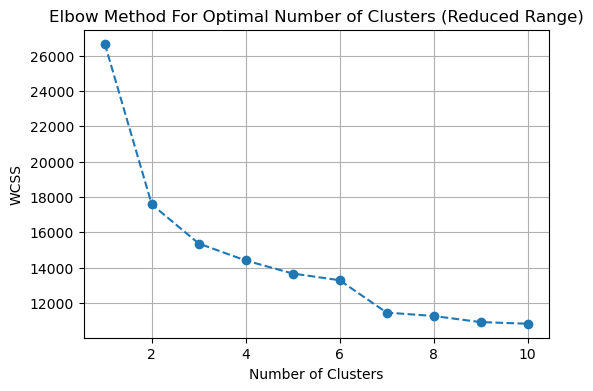

In [272]:
# Plot the results
plt.figure(figsize=(6, 4))
plt.plot(range(1,11), wcss_reduced, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters (Reduced Range)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [273]:
# Define the weights for each feature as provided
# Assigning weights based on perceived luxury contribution
weights = {
    '24/7 Power Backup': 8,
    '24/7 Water Supply': 4,
    '24x7 Security': 7,
    'ATM': 4,
    'Aerobics Centre': 6,
    'Airy Rooms': 8,
    'Amphitheatre': 7,
    'Badminton Court': 7,
    'Banquet Hall': 8,
    'Bar/Chill-Out Lounge': 9,
    'Barbecue': 7,
    'Basketball Court': 7,
    'Billiards': 7,
    'Bowling Alley': 8,
    'Business Lounge': 9,
    'CCTV Camera Security': 8,
    'Cafeteria': 6,
    'Car Parking': 6,
    'Card Room': 6,
    'Centrally Air Conditioned': 9,
    'Changing Area': 6,
    "Children's Play Area": 7,
    'Cigar Lounge': 9,
    'Clinic': 5,
    'Club House': 9,
    'Concierge Service': 9,
    'Conference room': 8,
    'Creche/Day care': 7,
    'Cricket Pitch': 7,
    'Doctor on Call': 6,
    'Earthquake Resistant': 5,
    'Entrance Lobby': 7,
    'False Ceiling Lighting': 6,
    'Feng Shui / Vaastu Compliant': 5,
    'Fire Fighting Systems': 8,
    'Fitness Centre / GYM': 8,
    'Flower Garden': 7,
    'Food Court': 6,
    'Foosball': 5,
    'Football': 7,
    'Fountain': 7,
    'Gated Community': 7,
    'Golf Course': 10,
    'Grocery Shop': 6,
    'Gymnasium': 8,
    'High Ceiling Height': 8,
    'High Speed Elevators': 8,
    'Infinity Pool': 9,
    'Intercom Facility': 7,
    'Internal Street Lights': 6,
    'Internet/wi-fi connectivity': 7,
    'Jacuzzi': 9,
    'Jogging Track': 7,
    'Landscape Garden': 8,
    'Laundry': 6,
    'Lawn Tennis Court': 8,
    'Library': 8,
    'Lounge': 8,
    'Low Density Society': 7,
    'Maintenance Staff': 6,
    'Manicured Garden': 7,
    'Medical Centre': 5,
    'Milk Booth': 4,
    'Mini Theatre': 9,
    'Multipurpose Court': 7,
    'Multipurpose Hall': 7,
    'Natural Light': 8,
    'Natural Pond': 7,
    'Park': 8,
    'Party Lawn': 8,
    'Piped Gas': 7,
    'Pool Table': 7,
    'Power Back up Lift': 8,
    'Private Garden / Terrace': 9,
    'Property Staff': 7,
    'RO System': 7,
    'Rain Water Harvesting': 7,
    'Reading Lounge': 8,
    'Restaurant': 8,
    'Salon': 8,
    'Sauna': 9,
    'Security / Fire Alarm': 9,
    'Security Personnel': 9,
    'Separate entry for servant room': 8,
    'Sewage Treatment Plant': 6,
    'Shopping Centre': 7,
    'Skating Rink': 7,
    'Solar Lighting': 6,
    'Solar Water Heating': 7,
    'Spa': 9,
    'Spacious Interiors': 9,
    'Squash Court': 8,
    'Steam Room': 9,
    'Sun Deck': 8,
    'Swimming Pool': 8,
    'Temple': 5,
    'Theatre': 9,
    'Toddler Pool': 7,
    'Valet Parking': 9,
    'Video Door Security': 9,
    'Visitor Parking': 7,
    'Water Softener Plant': 7,
    'Water Storage': 7,
    'Water purifier': 7,
    'Yoga/Meditation Area': 7
}
# Calculate luxury score for each row
luxury_score = features_binary_df[list(weights.keys())].multiply(list(weights.values())).sum(axis=1)

In [274]:
df['luxury_score'] = luxury_score

In [275]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,features_list,luxury_score
0,flat,smart world orchard,sector 61,2.60,14723.0,1766.0,Super Built up area 1630(151.43 sq.m.),3,3,2,not available,2.0,NaN,New Property,"['Sector 55-56 Metro station', 'Bestech Central Square Mall', 'Golf Course Ext Road', 'Badshahpur Sohna Rd Hwy', 'ORCHIDS The International School', 'Sushant University', 'Marengo Asia Hospitals', 'Indira Gandhi Intl Airport', 'Gurgaon Railway Station']",[],"['Lift(s)', 'Swimming Pool', 'Park', 'Visitor Parking', 'Security Personnel', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']",1630.0,NaN,NaN,0,0,0,0,0,0,"[Lift(s), Swimming Pool, Park, Visitor Parking, Security Personnel, Shopping Centre, Fitness Centre / GYM, Club house / Community Center]",47
1,flat,pioneer park,sector 61,2.10,11666.0,1800.0,Super Built up area 1800(167.23 sq.m.)Carpet area: 1400 sq.ft. (130.06 sq.m.),3,3,3,not available,15.0,South-East,Relatively New,"['Sector 55-56 Rapid Metro', 'Hong Kong Bazaar', 'Golf Course Ext Rd', 'Gurugram University', 'Pathways School Gurgaon', 'W Pratiksha Hospital', 'Indira Gandhi International Airport', 'Duke Horse Riding Club', 'DLF Golf and Country Club', 'AIPL Business Club', 'Radisson Hotel Gurugram', 'SkyJumper Trampoline Park', 'PVR Drive In Theatre', 'Surajgarh Gurgaon']","['3 Wardrobe', '1 Water Purifier', '4 Fan', '1 Exhaust Fan', '4 Geyser', '14 Light', '2 AC', '1 Modular Kitchen', '1 Curtains', '1 Chimney', 'No Bed', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine']","['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']",1800.0,NaN,1400.0,0,0,0,0,0,2,"[Feng Shui / Vaastu Compliant, Security / Fire Alarm, Intercom Facility, Lift(s), Maintenance Staff, Water Storage, Park, Visitor Parking]",49
2,flat,godrej air,sector 85,2.60,12212.0,2129.0,Built Up area: 2129 (197.79 sq.m.),3,3,3,servant room,17.0,NaN,Under Construction,"['Sapphire 83 Mall', 'Sector 86 Road', 'Dwarka Expy', 'Euro International School', 'Sushant University', 'Shri Balaji’s Multispeciality Hospital', 'Indira Gandhi Intl Airport', 'Garhi Harsaru Junction']",NaN,"['Mini Theatre', 'Swimming Pool', 'Flower Garden', 'School', 'Terrace Garden', 'Pergola', 'Creche/Day care', 'Skating Rink', 'Grocery Shop']",NaN,2129.0,NaN,0,1,0,0,0,0,"[Mini Theatre, Swimming Pool, Flower Garden, School, Terrace Garden, Pergola, Creche/Day care, Skating Rink, Grocery Shop]",44
3,flat,shree vardhman victoria,sector 70,1.23,9111.0,1350.0,Super Built up area 1350(125.42 sq.m.),2,2,3,study room,1.0,North-East,Relatively New,"['Airia Mall', 'Golf Course Extn Road', 'Sohna Road', 'Southern Peripheral Rd, Gurugram', 'Kunskapsskolan International', 'Ektaa Hospitals Main Sohna Rd', 'Sanjeevani Hospital - Child Specialist', 'Federal Bank Sector 71', 'Central Bank Of India Sohna Rd', 'Axis Bank, Sohna Rd', 'Spaze Palazo, Golf Course Ext Rd', 'VATIKA BUSINESS PARK Sohna Rd', 'The Medicity, Spaze iTech Park', 'Tulip Violet Society, Sector 69', 'IndianOil, Hasanpur']",NaN,"['Power Back-up', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'Swimming Pool', 'Park', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center', 'Water softening plant']",1350.0,NaN,NaN,1,0,0,0,0,0,"[Power Back-up, Feng Shui / Vaastu Compliant, Intercom Facility, Lift(s), Swimming Pool, Park, Shopping Centre, Fitness Centre / GYM, Club house / Community Center, Water softening plant]",43
4,flat,central park flower valley,sector 33,1.35,10384.0,1300.0,Carpet area: 1300 (120.77 sq.m.),3,2,2,not available,3.0,West,New Property,"['Golf Course Extension Rd',

In [276]:
# cols to drop -> nearbyLocations,furnishDetails, features,features_list, additionalRoom
df.drop(columns=['nearbyLocations','furnishDetails','features','features_list','additionalRoom'],inplace=True)

In [277]:
df.sample(5)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
1673,flat,indiabulls enigma,sector 110,4.00,9851.0,4061.0,Built Up area: 3350 (311.23 sq.m.),4,4,3,17.0,NaN,New Property,NaN,3350.0,NaN,0,0,0,0,0,0,59
3034,flat,spaze privy at,sector 84,1.35,9642.0,1400.0,Super Built up area 1918(178.19 sq.m.)Built Up area: 1750 sq.ft. (162.58 sq.m.)Carpet area: 1400 sq.ft. (130.06 sq.m.),3,3,3,7.0,South-East,Relatively New,1918.0,1750.0,1400.0,0,0,0,1,0,0,90
731,flat,ambience creacions,sector 22,4.78,15469.0,3090.0,Super Built up area 3090(287.07 sq.m.)Built Up area: 2500 sq.ft. (232.26 sq.m.)Carpet area: 2250 sq.ft. (209.03 sq.m.),3,4,3,7.0,West,Relatively New,3090.0,2500.0,2250.0,0,1,0,0,1,1,111
991,house,independent,sector 4,0.70,6648.0,1053.0,Built Up area: 117 (97.83 sq.m.),3,3,0,1.0,NaN,Undefined,NaN,117.0,NaN,0,0,0,0,0,0,0
1107,flat,avl 36 gurgaon,sector 36,0.50,8333.0,600.0,Built Up area: 600 (55.74 sq.m.)Carpet area: 500 sq.ft. (46.45 sq.m.),1,1,1,5.0,NaN,Undefined,NaN,600.0,500.0,0,0,0,0,0,0,0


In [278]:
df.shape

(3803, 23)

In [279]:
df.to_csv('gurgaon_properties_cleaned_v2.csv',index=False)